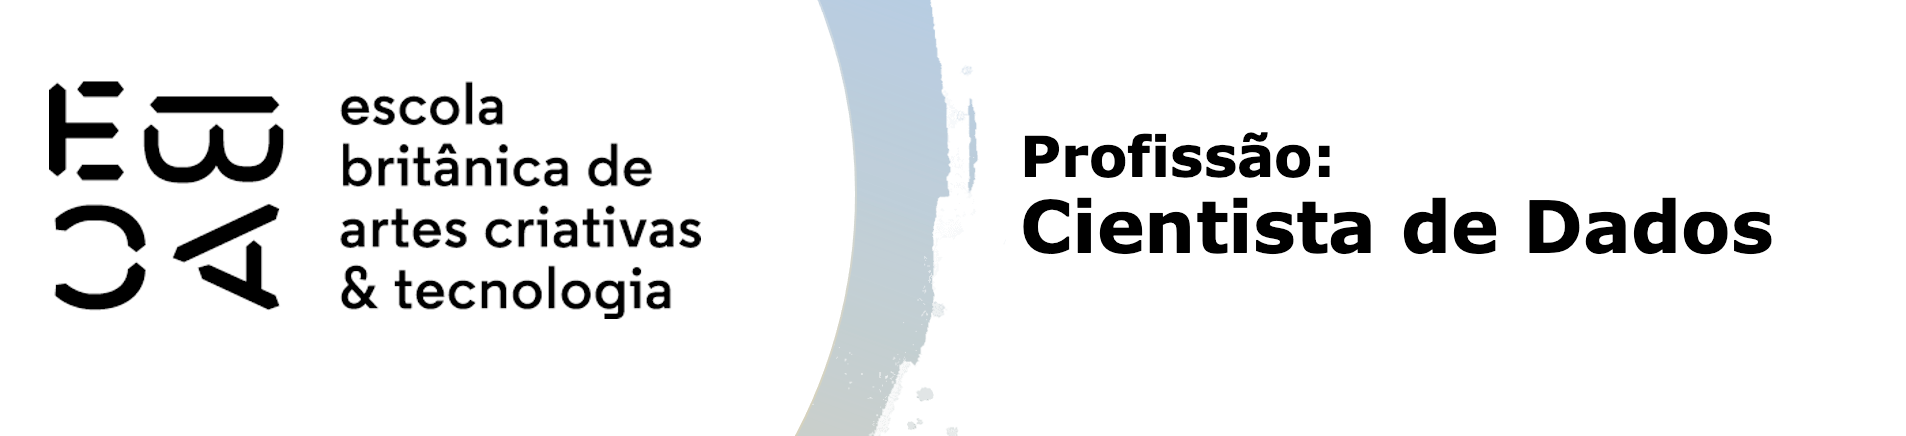

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [4]:
# Criando um DataFrame com as 6 variáveis desejadas
df_six_var = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']]
df_six_var

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000
...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667
12326,0,0.0,0,0.0,5,465.750000
12327,0,0.0,0,0.0,6,184.250000
12328,4,75.0,0,0.0,15,346.000000


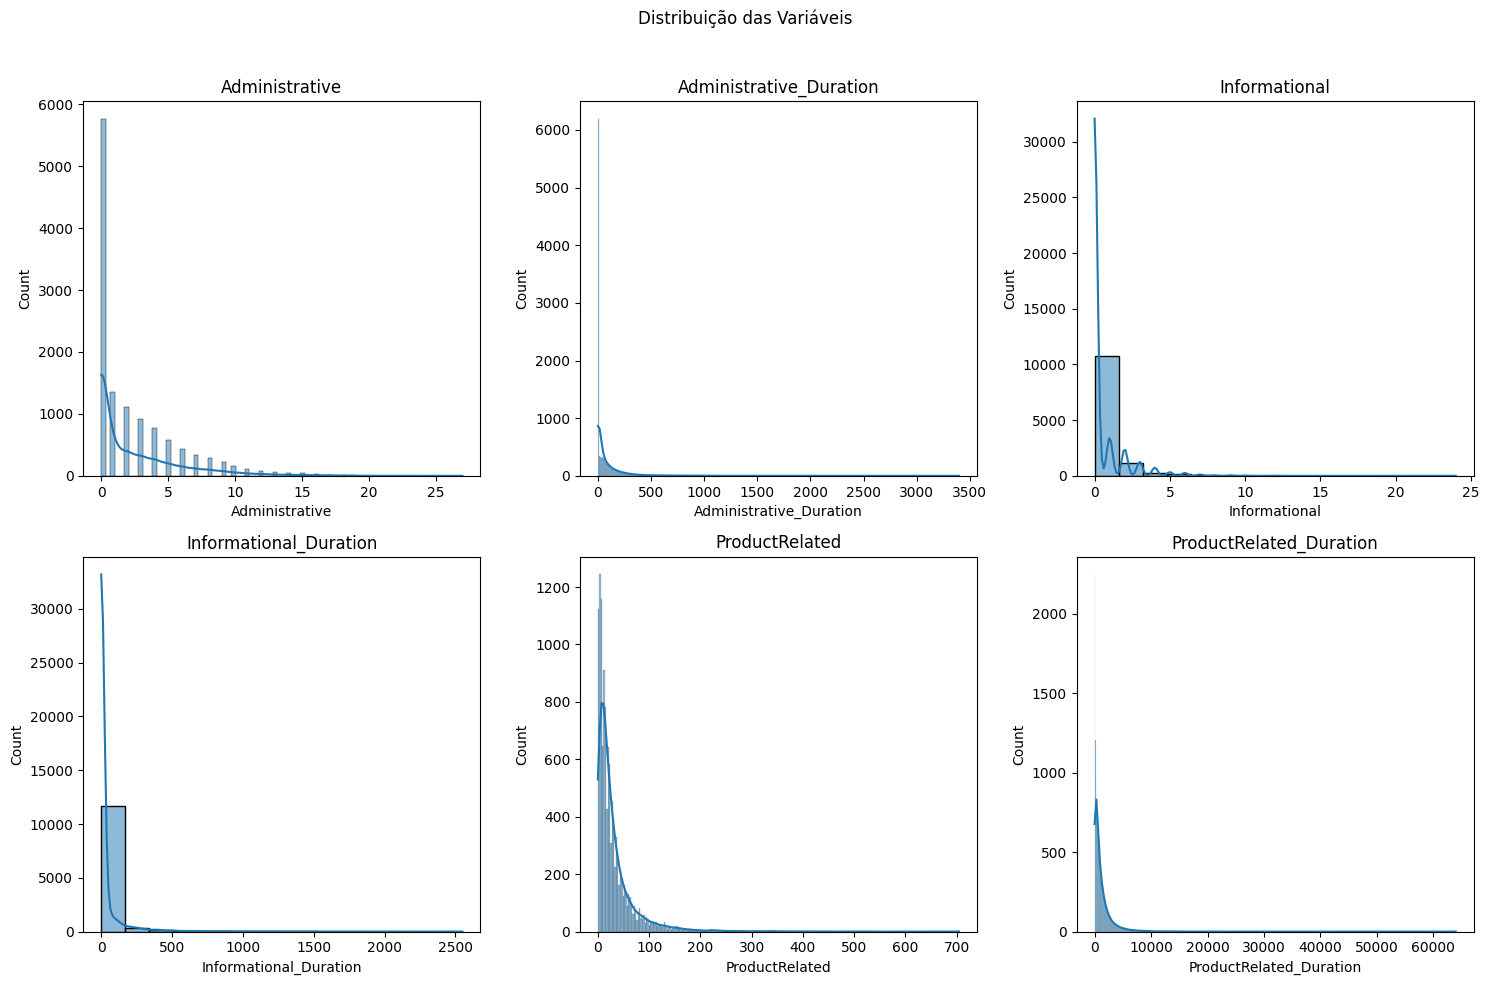

In [6]:
# Distribuição das variáveis

# Plotar histogramas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis')

sns.histplot(df['Administrative'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Administrative')

sns.histplot(df['Administrative_Duration'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Administrative_Duration')

sns.histplot(df['Informational'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Informational')

sns.histplot(df['Informational_Duration'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Informational_Duration')

sns.histplot(df['ProductRelated'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('ProductRelated')

sns.histplot(df['ProductRelated_Duration'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('ProductRelated_Duration')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


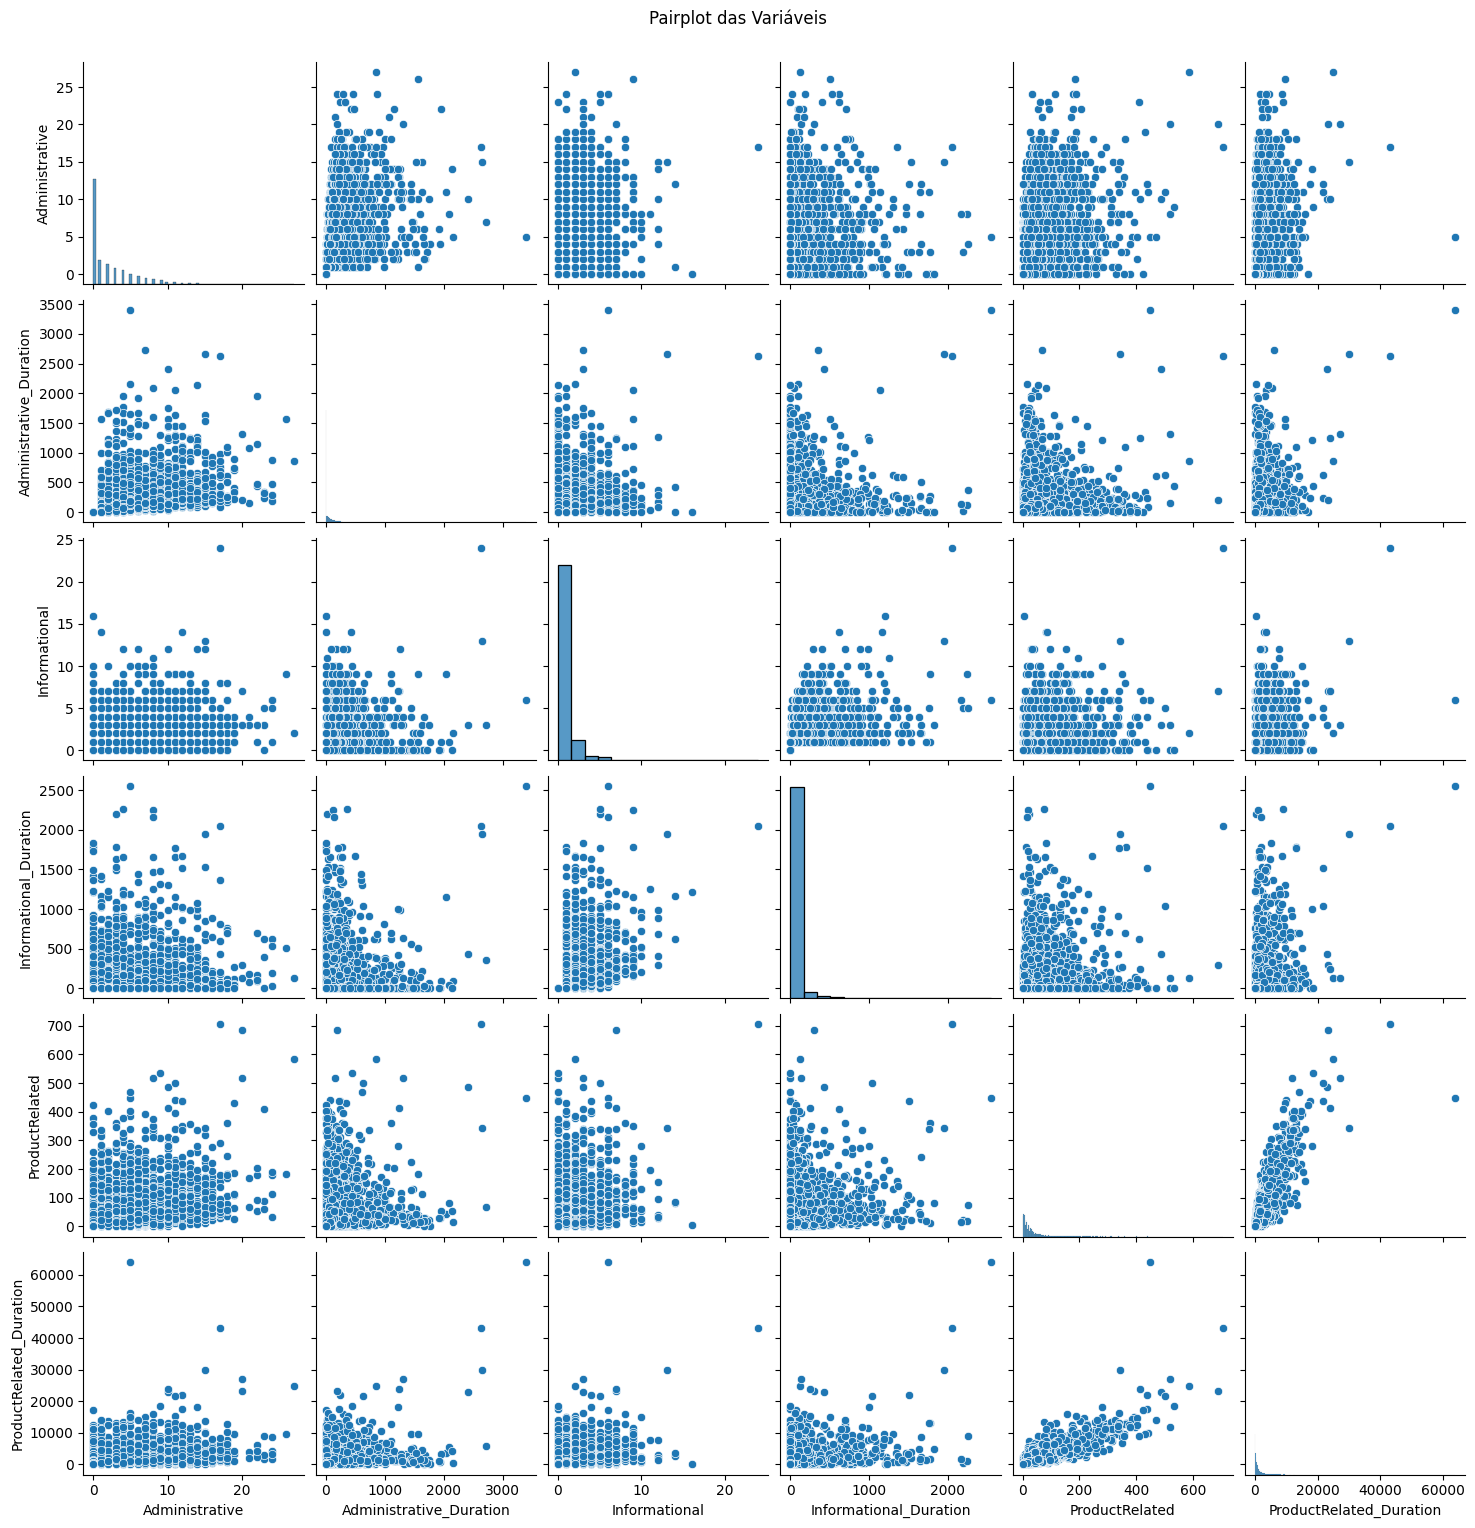

In [8]:
# Criar o pairplot
sns.pairplot(df_six_var)
plt.suptitle('Pairplot das Variáveis', y=1.02)
plt.show();

In [9]:
# Há valores faltantes?
df_six_var.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

In [11]:
# Padronizando as variáveis
from sklearn.preprocessing import StandardScaler

# Padronizar as variáveis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_six_var)
scaled_data

array([[-0.69699296, -0.4571914 , -0.3964779 , -0.24493051, -0.69100318,
        -0.62434752],
       [-0.69699296, -0.4571914 , -0.3964779 , -0.24493051, -0.66851798,
        -0.59090256],
       [-0.69699296, -0.4571914 , -0.3964779 , -0.24493051, -0.69100318,
        -0.62434752],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , -0.24493051, -0.57857718,
        -0.52806261],
       [ 0.50722805, -0.03291592, -0.3964779 , -0.24493051, -0.37621039,
        -0.4435357 ],
       [-0.69699296, -0.4571914 , -0.3964779 , -0.24493051, -0.64603278,
        -0.61324275]])

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

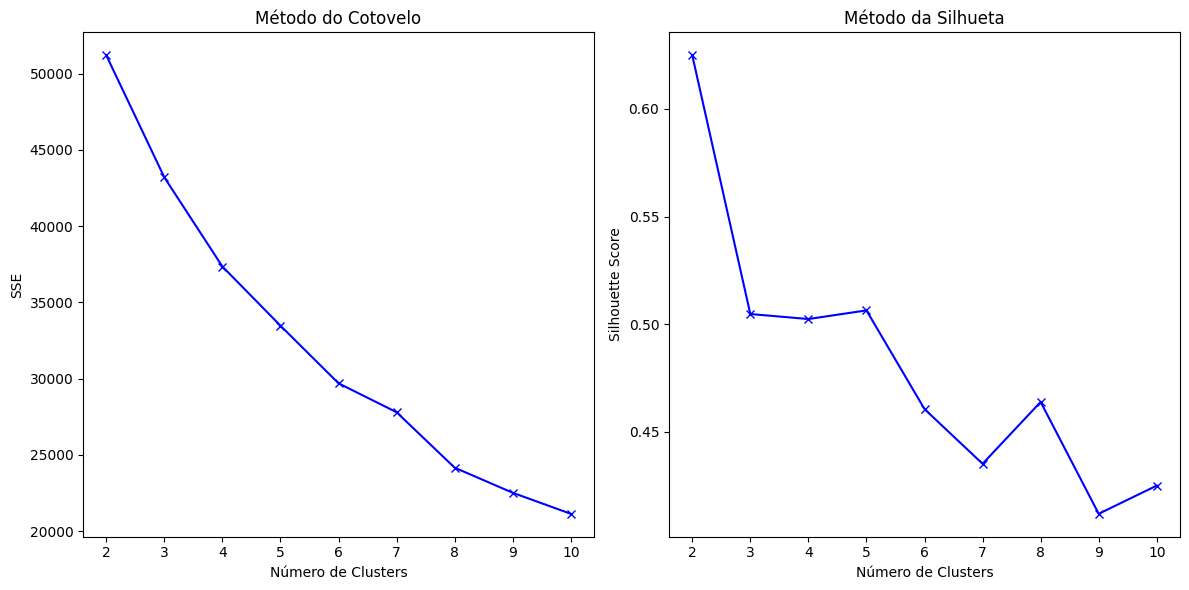

In [18]:
# Método do Cotovelo
sse = []
silhouette_scores = []
K = range(2, 11)  # Avaliar de 2 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)  # SSE
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotar o gráfico do cotovelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método do Cotovelo')

# Plotar o gráfico da silhueta
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Método da Silhueta')

plt.tight_layout()
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [19]:
# Função para aplicar KMeans e adicionar rótulos ao DataFrame original
def apply_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_data)
    df[f'Cluster_{n_clusters}'] = kmeans.labels_
    return kmeans

# Aplicar KMeans para 3 clusters
kmeans_3 = apply_kmeans(3)

# Aplicar KMeans para 5 clusters
kmeans_5 = apply_kmeans(5)

           Administrative  Administrative_Duration  Informational  \
Cluster_3                                                           
0                6.553469               252.065249       0.996735   
1                0.924223                24.870720       0.159593   
2                7.030909               267.072347       4.141818   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_3                                                                   
0                       43.438230       56.688571              2103.044618  
1                        6.485034       18.900000               688.501653  
2                      469.301160      138.227273              5736.438462  


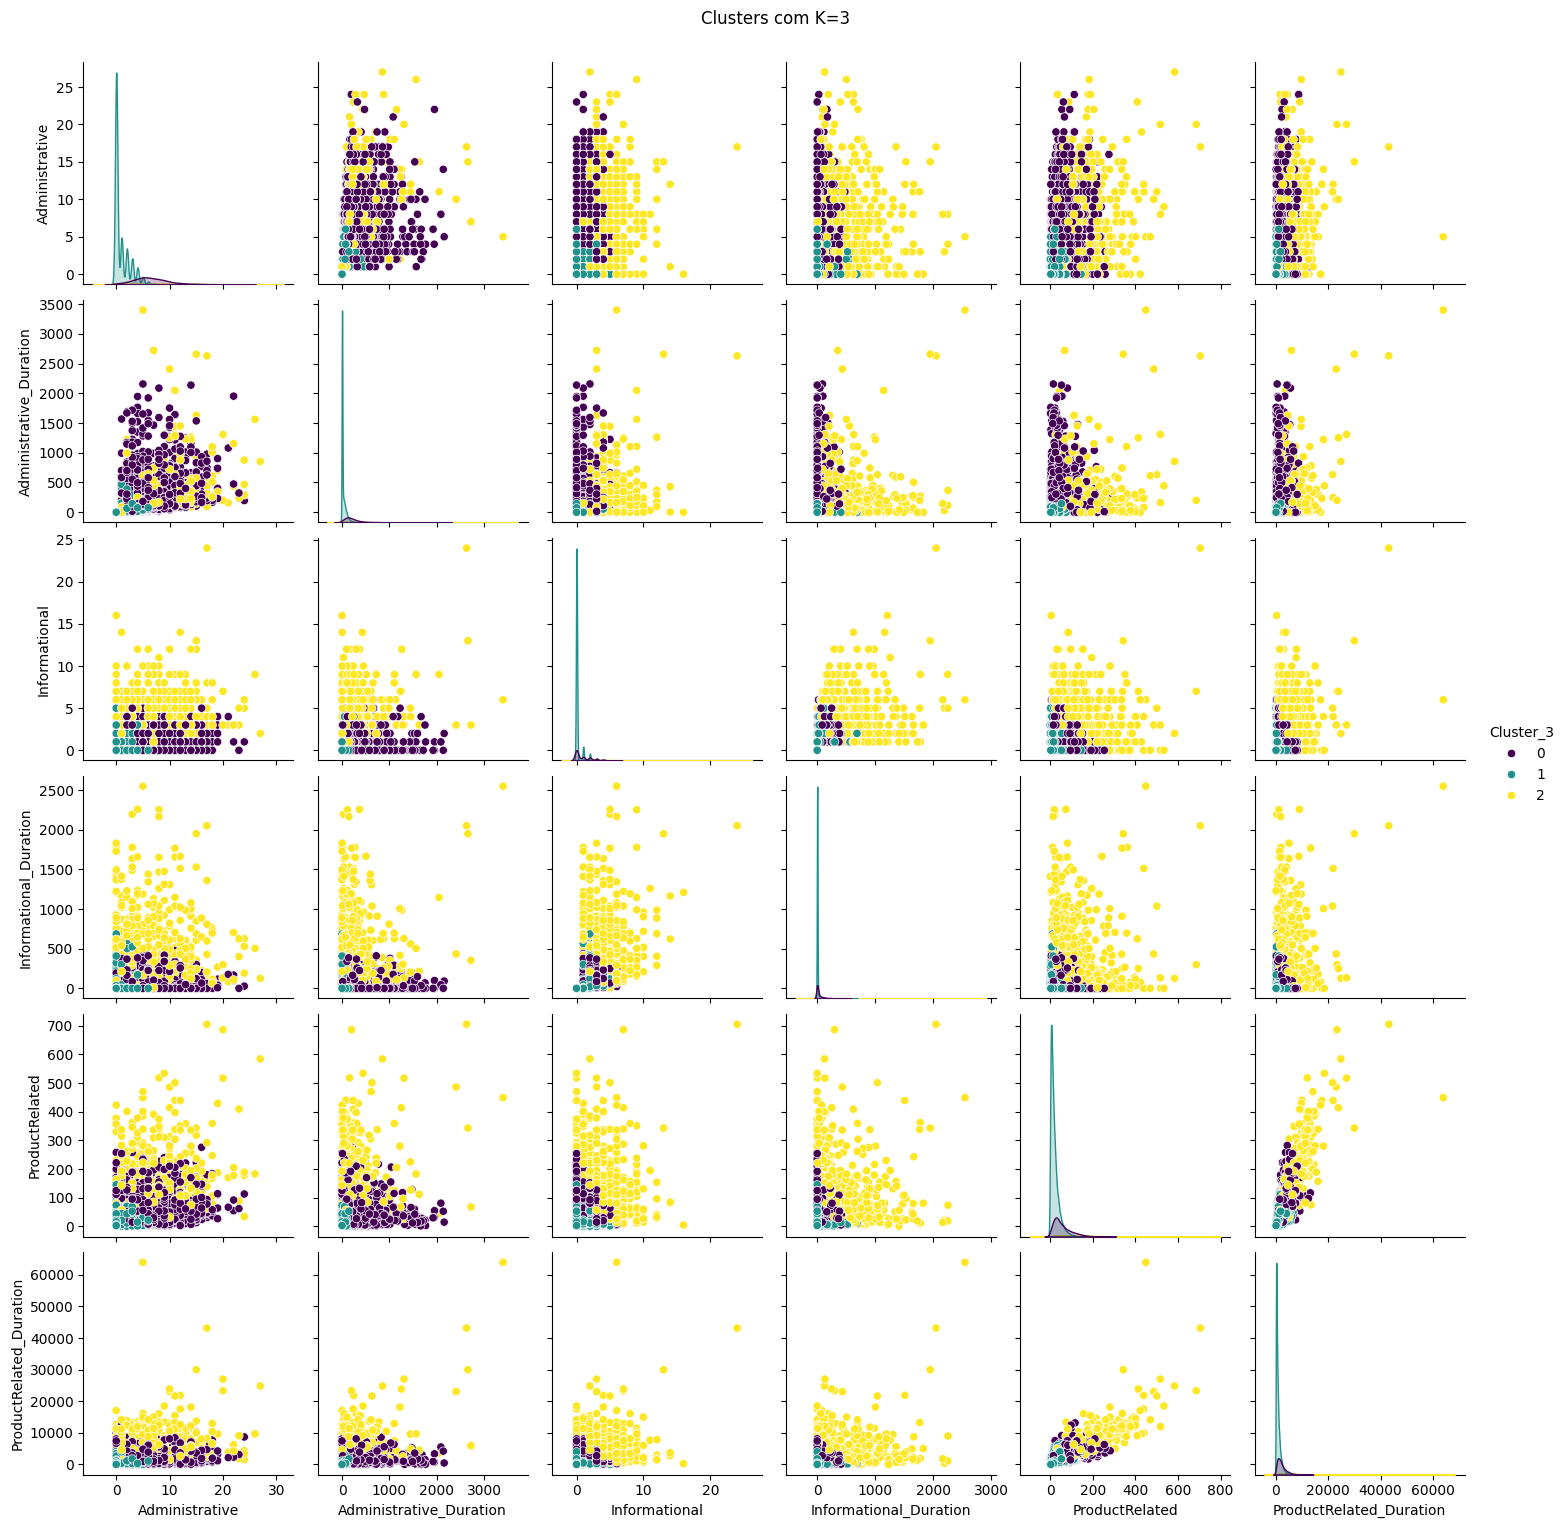

In [23]:
# Estatísticas descritivas para 3 clusters
# Selecionar as colunas de interesse
columns_of_interest = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

desc_3 = df.groupby('Cluster_3')[columns_of_interest].mean()
print(desc_3)

# Visualização dos clusters
sns.pairplot(df, vars=columns_of_interest, hue='Cluster_3', palette='viridis')
plt.suptitle('Clusters com K=3', y=1.02)
plt.show()

           Administrative  Administrative_Duration  Informational  \
Cluster_5                                                           
0                0.705642                19.579273       0.119729   
1                8.729008               904.657139       1.263359   
2                7.784722               256.892218       2.267361   
3                5.564130               158.969749       0.813148   
4                5.719048               173.604418       4.580952   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_5                                                                   
0                        4.437911       17.057704               616.187972  
1                       69.091201       51.702290              2265.032756  
2                      153.922332      226.125000              9126.384440  
3                       31.706862       50.120400              1837.709847  
4                      561.601610       62.526190     

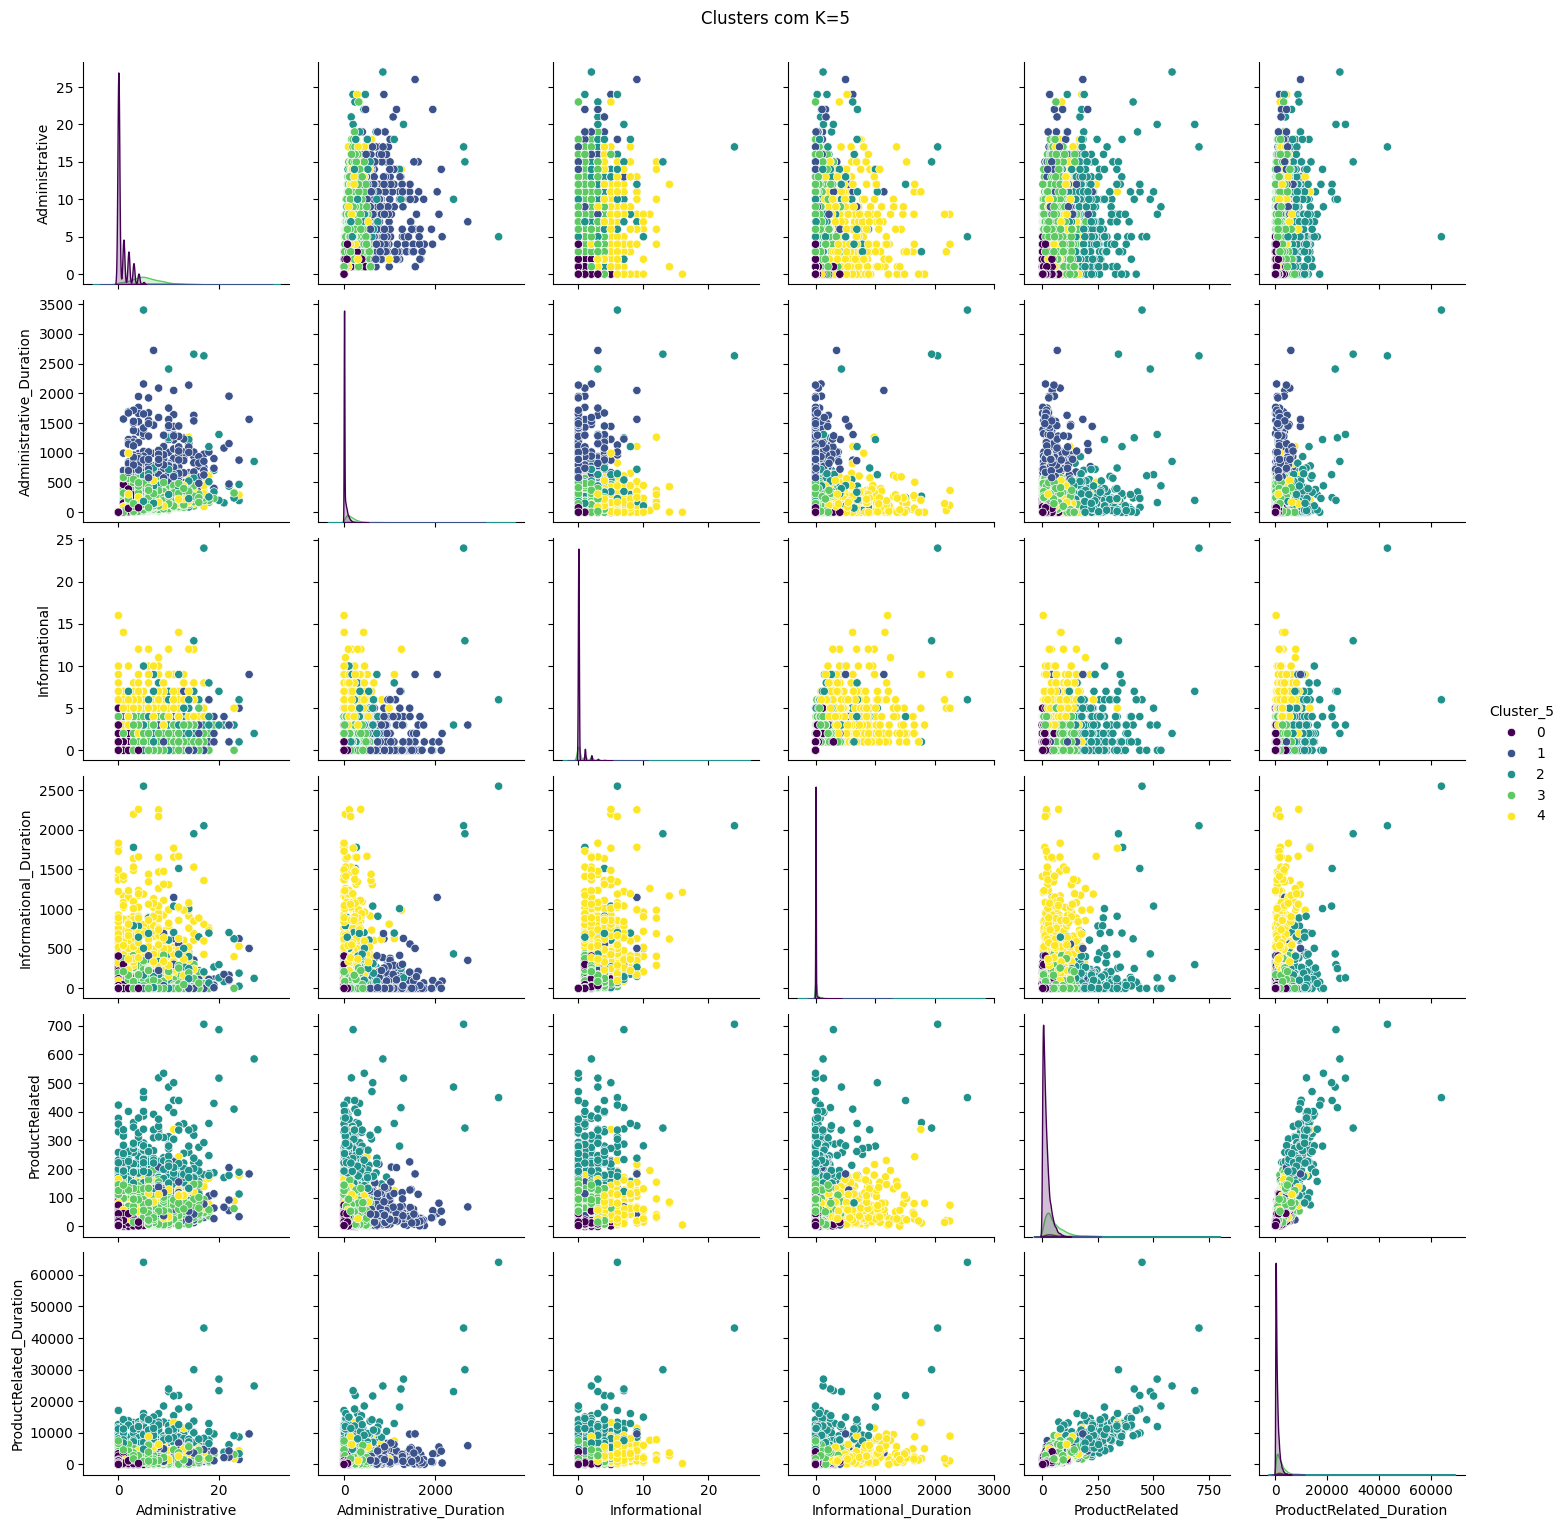

In [24]:
# Estatísticas descritivas para 5 clusters
desc_5 = df.groupby('Cluster_5')[columns_of_interest].mean()
print(desc_5)

# Visualização dos clusters
sns.pairplot(df, vars=columns_of_interest, hue='Cluster_5', palette='viridis')
plt.suptitle('Clusters com K=5', y=1.02)
plt.show()

O agrupamento com 5 clusters oferece uma segmentação mais detalhada, identificando subgrupos que podem ser mais úteis para análises e ações específicas. Este agrupamento mostra variações mais claras e detalhadas nas características dos clusters, o que pode proporcionar insights mais ricos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [25]:
# Função para aplicar KMeans e adicionar rótulos ao DataFrame original
def apply_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    df[f'Cluster_{n_clusters}'] = kmeans.labels_
    return kmeans

# Aplicar KMeans para 5 clusters
kmeans_5 = apply_kmeans(5)

In [26]:
# Calcular as estatísticas descritivas para bounce rate e revenue
bounce_rate_desc = df.groupby('Cluster_5')['BounceRates'].mean()
revenue_desc = df.groupby('Cluster_5')['Revenue'].mean()

print("Bounce Rate Médio por Cluster:")
print(bounce_rate_desc)

print("\nRevenue Médio por Cluster:")
print(revenue_desc)


Bounce Rate Médio por Cluster:
Cluster_5
0    0.006677
1    0.007683
2    0.028970
3    0.005324
4    0.006465
Name: BounceRates, dtype: float64

Revenue Médio por Cluster:
Cluster_5
0    0.218959
1    0.271127
2    0.118875
3    0.347280
4    0.241379
Name: Revenue, dtype: float64


Baseado nas análises acima:

Cluster 3 apresenta o menor bounce rate e o maior revenue médio. Isso indica que os visitantes desse cluster são os mais engajados e os mais propensos a realizar compras.
Portanto, Cluster 3 é o grupo mais propenso a comprar, com base na combinação do menor bounce rate e do maior revenue médio.